In [1]:
import os
import math
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
cwd = os.getcwd()
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import display
from matplotlib.lines import Line2D
pd.options.display.max_columns = None

In [3]:
plt.style.use(['science'])
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
os.chdir(os.path.join(cwd,'../../..'))
import ExMAS.main
import ExMAS.utils
from ExMAS.utils import inData as inData
from ExMAS.main import matching

In [1]:
EXPERIMENT_NAME = 'res400_4'
KPIs = pd.read_csv('ExMAS/extras/game_results/{}_KPIs.csv'.format(EXPERIMENT_NAME), index_col = 0)
rides = pd.read_csv('ExMAS/extras/game_results/{}_rides.csv'.format(EXPERIMENT_NAME), index_col = 0)
rm = pd.read_csv('ExMAS/extras/game_results/{}_rm.csv'.format(EXPERIMENT_NAME), index_col = [0,1])

NameError: name 'pd' is not defined

In [6]:
PRICINGS = ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']

for i,PRICING in enumerate(PRICINGS):
    
    for j, ALGO in enumerate(['EXMAS', 'TNE', 'HERMETIC', 'RUE', 'RSIE', 'TSE']):
        col_name = "pruned_Pricing-{}_Pruning-['{}']".format(PRICING, ALGO)
        rm[col_name] = rm.apply(lambda r: rides.loc[r.ride][col_name], axis = 1)

In [7]:
df = rm
palette = sns.color_palette(colors[0:4])
df['travel time'] = df['ttrav_sh']
df['user discomfort'] = df['cost_user']
cols = ['user discomfort','UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']
ALGOS = ['EXMAS','TNE', 'HERMETIC', 'RUE', 'RSIE', 'TSE']
titles = ['user direct costs $C(G,i)$','uniform', 'externality-based','residual','subgroup-based']



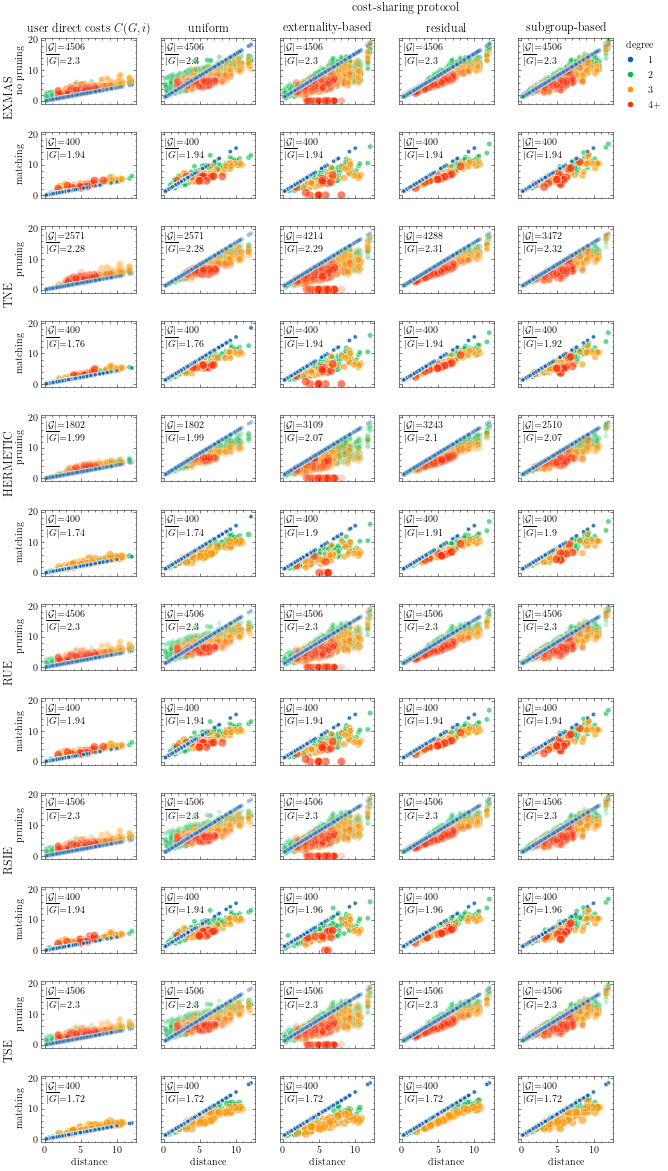

In [7]:
fig, axes = plt.subplots(12,len(cols), figsize = (len(cols)*2,1.5*2*6), sharey=True, sharex = True)
df['deg'] = df.degree.apply(lambda x: '4+' if x>3 else str(x))
df['distance'] = df['dist']/1000
df['size'] = 0.7*df['degree']**2 

def single_scatter(col, df, ax, alpha = 0.2, legend = False, text = True):
    pal = sns.color_palette(colors[0:df.deg.nunique()])
    sns.scatterplot(x='distance',y=col, data = df, ax = ax, hue = 'deg', alpha = alpha, palette = pal, size = df['size'])
    sns.scatterplot(x='distance',y=col, data = df[df.degree==1], ax = ax, alpha = alpha, color = colors[0], size = df['size'])
    if not legend:
        ax.get_legend().remove()
    if text:
        label = "$|\mathcal{G}|$="+ str(df.shape[0]) +"\n$\overline{|G|}$="+ str(round(df.degree.mean(),2))
        ax.text(0.05,0.6,label,rotation=0, fontsize = 10, transform=ax.transAxes)
        
for i,col in enumerate(cols):
        
    axes[0][i].set_title(titles[i])
    sns.scatterplot(x='distance',y=col, data = df, ax = axes[0][i], hue = 'deg', alpha = 0.2, palette = palette, size = df['size'])
    if col is not 'SUBGROUP':
        sns.scatterplot(x='distance',y=col, data = df[df.degree==1], ax = axes[0][i], alpha = 0.2, color = 'blue', size = df['size'])    
    
    for j, ALGO in enumerate(ALGOS):
                            
        matching_column = "Experiment-{}_Pricing-{}_Objective-['total_group_cost']_Pruning-['{}']_minmax-min".format(EXPERIMENT_NAME,'UNIFORM' if col == 'user discomfort' else col,ALGO)
        pruning_column = "pruned_Pricing-{}_Pruning-['{}']".format('UNIFORM' if col == 'user discomfort' else col, ALGO)
        single_scatter(col, df = df[df[pruning_column]==True], ax = axes[2*j][i], legend = False)
        
        single_scatter(col, df = df[df[matching_column]==1], ax = axes[2*j+1][i], alpha = 0.6)
        #axes[2*j][0].set_ylabel('no pruning' if ALGO == 'EXMAS' else ALGO + " pruning")
        #axes[2*j+1][0].set_ylabel('no pruning match' if ALGO == 'EXMAS' else ALGO + " matching")
        if i ==0:
            axes[2*j][0].set_ylabel("pruning")
            axes[2*j+1][0].set_ylabel("matching")
            axes[2*j][0].text(-0.4, -0.2, ALGO,rotation='vertical', transform=axes[2*j][0].transAxes, fontsize = 12)
            
    if i>0:
        axes[0][i].set_ylabel('')
    else:
        axes[0][i].set_ylabel('no pruning')
custom = [Line2D([], [], marker='.', color=colors[i], linestyle='', ms = 9) for i in [0,1,2,3]]

axes[0][4].legend(custom, ['1', '2','3','4+'], loc='upper right',bbox_to_anchor=(1.6, 1.1), title = 'degree')          
        
    #if i<len(cols)-1:
    #    axes[0][i].get_legend().remove()
fig.text(0.5, 0.95,'cost-sharing protocol', fontsize = 12)
plt.tight_layout(rect=[0, 0.05, 0.95, 0.95])
plt.savefig('scatters.png')

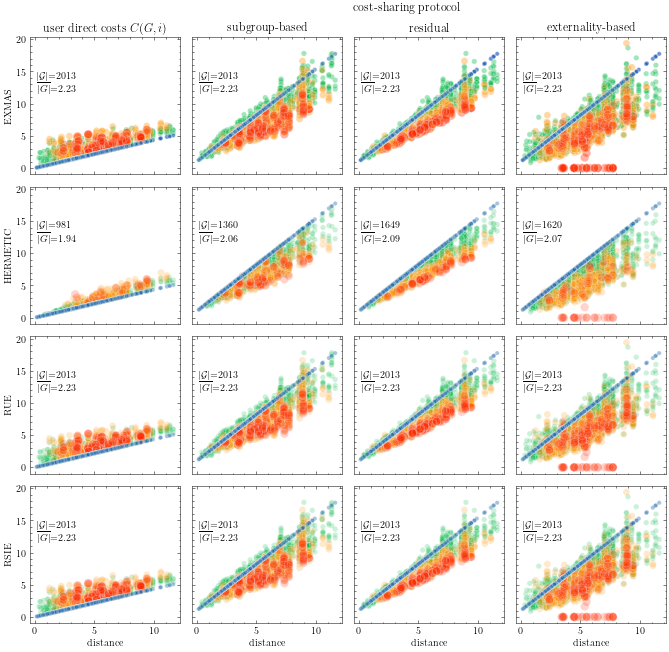

In [31]:
df = rm
palette = sns.color_palette(colors[0:4])
df['travel time'] = df['ttrav_sh']
df['user discomfort'] = df['cost_user']
cols = ['user discomfort','SUBGROUP','RESIDUAL','EXTERNALITY']
ALGOS = ['EXMAS', 'HERMETIC', 'RUE', 'RSIE']
titles = ['user direct costs $C(G,i)$' ,'subgroup-based', 'residual' , 'externality-based']

fig, axes = plt.subplots(4,4,figsize = (10,10), sharey=True, sharex = True)
df['deg'] = df.degree.apply(lambda x: '4+' if x>3 else str(x))
df['distance'] = df['dist']/1000
df['size'] = 0.7*df['degree']**2 

def single_scatter(col, df, ax, alpha = 0.2, legend = False, text = True):
    pal = sns.color_palette(colors[0:df.deg.nunique()])
    sns.scatterplot(x='distance',y=col, data = df, ax = ax, hue = 'deg', alpha = alpha, palette = pal, size = df['size'])
    sns.scatterplot(x='distance',y=col, data = df[df.degree==1], ax = ax, alpha = alpha, color = colors[0], size = df['size'])
    if not legend:
        ax.get_legend().remove()
    if text:
        label = "$|\mathcal{G}|$="+ str(df.ride.nunique()) +"\n$\overline{|G|}$="+ str(round(df.degree.mean(),2))
        ax.text(0.05,0.6,label,rotation=0, fontsize = 10, transform=ax.transAxes)
        

for i,col in enumerate(cols):
        
    axes[0][i].set_title(titles[i])
    sns.scatterplot(x='distance',y=col, data = df, ax = axes[0][i], hue = 'deg', alpha = 0.2, palette = palette, size = df['size'])
    if col is not 'SUBGROUP':
        sns.scatterplot(x='distance',y=col, data = df[df.degree==1], ax = axes[0][i], alpha = 0.2, color = 'blue', size = df['size'])    
    
    for j, ALGO in enumerate(ALGOS):
                            
        matching_column = "Experiment-{}_Pricing-{}_Objective-['total_group_cost']_Pruning-['{}']_minmax-min".format(EXPERIMENT_NAME,'UNIFORM' if col == 'user discomfort' else col,ALGO)
        pruning_column = "pruned_Pricing-{}_Pruning-['{}']".format('UNIFORM' if col == 'user discomfort' else col, ALGO)
        single_scatter(col, df = df[df[pruning_column]==True], ax = axes[j][i], legend = False)
        
        #single_scatter(col, df = df[df[matching_column]==1], ax = axes[2*j+1][i], alpha = 0.6)
        #axes[2*j][0].set_ylabel('no pruning' if ALGO == 'EXMAS' else ALGO + " pruning")
        #axes[2*j+1][0].set_ylabel('no pruning match' if ALGO == 'EXMAS' else ALGO + " matching")
        #if i ==0:
        axes[j][0].set_ylabel(ALGO)
            #axes[2*j+1][0].set_ylabel("matching")
            #axes[2*j][0].text(-0.4, -0.2, ALGO,rotation='vertical', transform=axes[2*j][0].transAxes, fontsize = 12)
            
    if i>0:
        axes[0][i].set_ylabel('')
    else:
        axes[0][i].set_ylabel('no pruning')
custom = [Line2D([], [], marker='.', color=colors[i], linestyle='', ms = 9) for i in [0,1,2,3]]

#axes[0][4].legend(custom, ['1', '2','3','4+'], loc='upper right',bbox_to_anchor=(1.6, 1.1), title = 'degree')          
        
    #if i<len(cols)-1:
    #    axes[0][i].get_legend().remove()
fig.text(0.5, 0.95,'cost-sharing protocol', fontsize = 12)
plt.tight_layout(rect=[0, 0.05, 0.95, 0.95])
#plt.savefig('scatters.png')

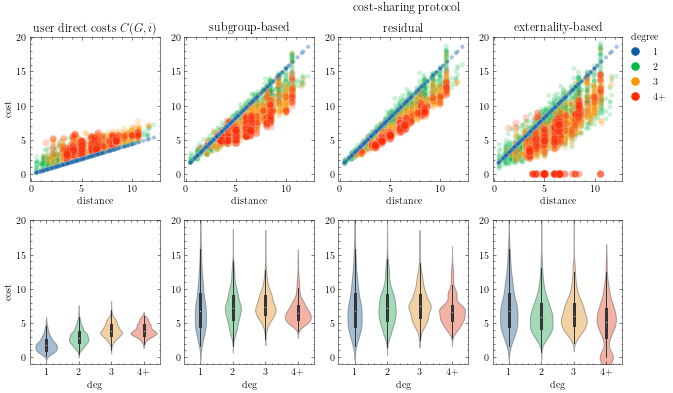

In [10]:
df = rm
palette = sns.color_palette(colors[0:4])
df['travel time'] = df['ttrav_sh']
df['user discomfort'] = df['cost_user']
cols = ['user discomfort','SUBGROUP','RESIDUAL','EXTERNALITY']
ALGOS = ['EXMAS']
titles = ['user direct costs $C(G,i)$' ,'subgroup-based', 'residual' , 'externality-based']

fig, axes = plt.subplots(2,4,figsize = (10,6), sharey=False, sharex = False)
df['deg'] = df.degree.apply(lambda x: '4+' if x>3 else str(x))
df['distance'] = df['dist']/1000
df['size'] = 0.7*df['degree']**2 

def single_scatter(col, df, ax,x = 'distance', alpha = 0.2, legend = False, text = True):
    pal = sns.color_palette(colors[0:df.deg.nunique()])
    sns.scatterplot(x=x,y=col, data = df, ax = ax, hue = 'deg', alpha = alpha, palette = pal, size = df['size'])
    sns.scatterplot(x=x,y=col, data = df[df.degree==1], ax = ax, alpha = alpha, color = colors[0], size = df['size'])
    if not legend:
        ax.get_legend().remove()
    if text:
        label = "$|\mathcal{G}|$ = "+ str(df.ride.nunique()) +"\n$\overline{|G|}$ = "+ str(round(df.degree.mean(),2)) +"\n $\overline{C_i}$ = "+ str(round(df[col].mean(),2))
        ax.text(0.05,0.6,label,rotation=0, fontsize = 10, transform=ax.transAxes)
        

for i,col in enumerate(cols):
    
#     sns.scatterplot(x='distance',y=col, data = df, ax = axes[0][i], hue = 'deg', alpha = 0.2, palette = palette, size = df['size'])
#     if col is not 'SUBGROUP':
#         sns.scatterplot(x='distance',y=col, data = df[df.degree==1], ax = axes[0][i], alpha = 0.2, color = 'blue', size = df['size'])    
    
    for j, ALGO in enumerate(ALGOS):
        #axes[0][j].set_title(ALGO)
                            
        matching_column = "Experiment-{}_Pricing-{}_Objective-['total_group_cost']_Pruning-['{}']_minmax-min".format(EXPERIMENT_NAME,'UNIFORM' if col == 'user discomfort' else col,ALGO)
        pruning_column = "pruned_Pricing-{}_Pruning-['{}']".format('UNIFORM' if col == 'user discomfort' else col, ALGO)
        single_scatter(col, df = df[df[pruning_column]==True], ax = axes[0][i], legend = False, text = False)
        #single_scatter(col, df = df[df[pruning_column]==True], ax = axes[1][i], legend = False, x = 'degree', text = False)
        sns.violinplot(x='deg',y=col, data = df[df[pruning_column]==True], ax = axes[1][i], alpha = 0.4, size = df[df[pruning_column]]['size'])
        for violin, alpha in zip(axes[1][i].collections[::2], [0.4,0.4,0.4,0.4]):
            violin.set_alpha(alpha)
        ax = axes[1][i].set_ylim((-1,20))
        ax = axes[0][i].set_ylim((-1,20))
        
        #single_scatter(col, df = df[df[matching_column]==1], ax = axes[2*j+1][i], alpha = 0.6)
        #axes[2*j][0].set_ylabel('no pruning' if ALGO == 'EXMAS' else ALGO + " pruning")
        #axes[2*j+1][0].set_ylabel('no pruning match' if ALGO == 'EXMAS' else ALGO + " matching")
        #if i ==0:
        #axes[j][0].set_ylabel(ALGO)
            #axes[2*j+1][0].set_ylabel("matching")
            #axes[2*j][0].text(-0.4, -0.2, ALGO,rotation='vertical', transform=axes[2*j][0].transAxes, fontsize = 12)
            
        axes[0][i].set_title(titles[i])
        axes[0][i].set_ylabel('')
        axes[1][i].set_ylabel('')
    axes[0][0].set_ylabel('cost')
    axes[1][0].set_ylabel('cost')
    
custom = [Line2D([], [], marker='.', color=colors[i], linestyle='', ms = 15) for i in [0,1,2,3]]

axes[0][-1].legend(custom, ['1', '2','3','4+'], loc='upper right',bbox_to_anchor=(1.4, 1.1), title = 'degree')          
        
    #if i<len(cols)-1:
    #    axes[0][i].get_legend().remove()
fig.text(0.5, 0.95,'cost-sharing protocol', fontsize = 12)
plt.tight_layout(rect=[0, 0.05, 0.95, 0.95])
plt.savefig('scatters.png')

,algo,pricing,max excess,mean excess
0,EXMAS,EXTERNALITY,1.116888,0.112372
1,HERMETIC,EXTERNALITY,1.116888,0.106979
2,RUE,EXTERNALITY,1.116888,0.112372
3,RSIE,EXTERNALITY,1.116888,0.112372
4,EXMAS,RESIDUAL,0.392725,0.040273
5,HERMETIC,RESIDUAL,0.378740,0.040518
6,RUE,RESIDUAL,0.392725,0.040273
7,RSIE,RESIDUAL,0.392725,0.041076
8,EXMAS,SUBGROUP,0.436466,0.044483
9,HERMETIC,SUBGROUP,0.436466,0.044483


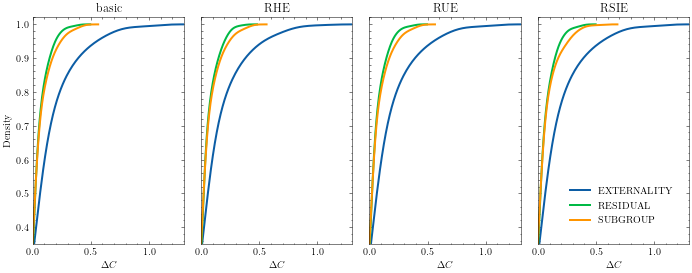

In [11]:
PRICINGS = ['EXTERNALITY','RESIDUAL','SUBGROUP']
ALGO_NAMES = ['basic', 'RHE', 'RUE', 'RSIE']
fig, axes = plt.subplots(1,4, figsize = (10,4), sharex = True, sharey = True)
j=-1
ret = list()
for i,PRICING in enumerate(PRICINGS):
    
    for j, ALGO in enumerate(['EXMAS', 'HERMETIC', 'RUE', 'RSIE']):
        
        col = "Experiment-{}_Pricing-{}_Objective-['total_group_cost']_Pruning-['{}']_minmax-min".format(EXPERIMENT_NAME, PRICING, ALGO)
        to_plot = rm[rm[col] == 1]
        
        to_plot['$\Delta C$']=(to_plot[PRICING]-to_plot['desired_{}'.format(PRICING)])/to_plot['desired_{}'.format(PRICING)]
        to_plot['$\Delta C$'] = to_plot['$\Delta C$'].replace(np.inf,np.nan).fillna(0)
        ret.append([ALGO, PRICING, to_plot['$\Delta C$'].max(), to_plot['$\Delta C$'].mean()] )
        sns.distplot(to_plot['$\Delta C$'],ax = axes[j], kde = True, hist = False, 
                     label = PRICING, 
                     rug_kws={"alpha":0.1, 'height':0.2, 'lw':2}, 
                     kde_kws={'bw':0.5, 'lw': 2, 'cumulative': True}, rug = False) 
        axes[j].set_xlim((0,1.3))
        axes[j].set_title(ALGO_NAMES[j])
        if j>0:
            axes[j].set_ylabel('')
        #axes[j].get_legend().remove()
        axes[j].set_ylim((0.35,1.02))
axes[-1].legend(bbox_to_anchor=(0.15, 0.3))
plt.tight_layout()
plt.savefig('hist.png', dpi = 600)
pd.DataFrame(ret,columns = ['algo','pricing','max excess', 'mean excess'])

In [92]:
KPIs['pricing'] = KPIs.apply(lambda x: x.name.split("_")[2].split("-")[1],axis =1)
KPIs['$T_i$'] = KPIs['PassHourTrav']/3600
KPIs['$T_G$'] = KPIs['VehHourTrav']/3600
KPIs['$C$'] = KPIs['cost_user']

In [93]:
def calc_eq13(rm, EXPERIMENT_NAME, ALGO, PRICING, minmax):
    
    matching_column = "Experiment-{}_Pricing-{}_Objective-['total_group_cost']_Pruning-['{}']_minmax-{}".format(EXPERIMENT_NAME, PRICING, ALGO, minmax)
    pruning_column = "pruned_Pricing-{}_Pruning-['{}']".format(PRICING,ALGO)
    if matching_column in rm.columns:
        df = rm[rm[pruning_column]==True]       
        rm[rm[matching_column]==1]
        dominating = 0
        for ride in df.ride.unique():
            if rm[rm.ride == ride][matching_column].iloc[0] == 0:
                this_ride = rm[rm.ride == ride]
                dominates = True
                for traveller in this_ride.traveller:
                    costs_at_match = rm[(rm.traveller == traveller) & (rm[matching_column]==1)].iloc[0][PRICING]
                    this_costs = rm[(rm.traveller == traveller) & (rm.ride == ride)].iloc[0][PRICING]
                    if this_costs >= costs_at_match:
                        dominates = False
                        break
                if dominates:
                    dominating+=1
        #print(EXPERIMENT_NAME, ALGO, PRICING, minmax,dominating, 1 - dominating/df.shape[0])
        return "{}_{}".format(dominating, 1 - dominating/df.shape[0])
    else:
        #print('invalid row')
        return "{}_{}".format(0, 0)

KPIs['EXPERIMENT_NAME'] = KPIs.apply(lambda x: x.name.split('_')[0].split('-')[1] if x.name.startswith('Experiment') else None, axis = 1)
KPIs['ALGO'] = KPIs['algo']
KPIs['PRICING'] = KPIs['pricing']    
KPIs['HS'] = KPIs.apply(lambda x: calc_eq13(rm, x.EXPERIMENT_NAME, x.ALGO, x.PRICING, x.minmax), axis = 1)
KPIs['H'] = KPIs.apply(lambda x: x.HS.split("_")[0], axis = 1)
KPIs['rel_H'] = KPIs.apply(lambda x: x.HS.split("_")[1], axis = 1)                    

In [95]:
KPIs[KPIs.algo == 'HERMETIC']

,ttrav_sh,cost_user,degree,u_veh,costs_veh,Fare_Discount,PAIRS,PLUS5,PassHourTrav,PassHourTrav_ns,PassUtility,PassUtility_ns,QUADRIPLES,QUINTETS,SINGLE,TRIPLES,VehHourTrav,VehHourTrav_ns,_typ,algo,dtype,eq13,experiment,fleet_size_nonshared,fleet_size_shared,lambda_shared,mean_lambda,minmax,nR,obj,pricing,revenue_ns,revenue_s,shared_ratio,$T_i$,$T_G$,$C$,EXPERIMENT_NAME,ALGO,PRICING,HS,H,rel_H
Experiment-res400_4_Pricing-UNIFORM_Objective-['total_group_cost']_Pruning-['HERMETIC']_minmax-min,224806.0,848.660750,692.0,156068.0,1529.34740,-0.2,92.0,0.0,220987.0,207763.0,3138.210350,3222.5,1.0,0.0,164.0,16.0,154688.0,207763.0,DotMap(),HERMETIC,DotMap(),0.6600,res400_4,304.0,201.0,0.357175,0.357175,min,400.0,total_group_cost,UNIFORM,311644.5,249315.6,0.5900,61.385278,42.968889,848.660750,res400,HERMETIC,UNIFORM,0_0,0,0
Experiment-res400_4_Pricing-UNIFORM_Objective-['total_group_cost']_Pruning-['HERMETIC']_minmax-max,207763.0,727.170500,400.0,207763.0,2072.49215,-0.2,0.0,0.0,207763.0,207763.0,3222.500000,3222.5,0.0,0.0,400.0,0.0,207763.0,207763.0,DotMap(),HERMETIC,DotMap(),0.3175,res400_4,304.0,304.0,0.000000,NaN,max,400.0,total_group_cost,UNIFORM,311644.5,249315.6,0.0000,57.711944,57.711944,727.170500,res400,HERMETIC,UNIFORM,0_0,0,0
Experiment-res400_4_Pricing-EXTERNALITY_Objective-['total_group_cost']_Pruning-['HERMETIC']_minmax-min,230537.0,875.063875,756.0,152014.0,1465.71270,-0.2,118.0,0.0,222599.0,207763.0,3119.730825,3222.5,0.0,0.0,104.0,20.0,150244.0,207763.0,DotMap(),HERMETIC,DotMap(),0.4450,res400_4,304.0,186.0,0.328316,0.328316,min,400.0,total_group_cost,EXTERNALITY,311644.5,249315.6,0.7400,61.833056,41.734444,875.063875,res400,HERMETIC,EXTERNALITY,0_0,0,0
Experiment-res400_4_Pricing-EXTERNALITY_Objective-['total_group_cost']_Pruning-['HERMETIC']_minmax-max,207763.0,727.170500,400.0,207763.0,2072.49215,-0.2,0.0,0.0,207763.0,207763.0,3222.500000,3222.5,0.0,0.0,400.0,0.0,207763.0,207763.0,DotMap(),HERMETIC,DotMap(),0.1200,res400_4,304.0,304.0,0.000000,NaN,max,400.0,total_group_cost,EXTERNALITY,311644.5,249315.6,0.0000,57.711944,57.711944,727.170500,res400,HERMETIC,EXTERNALITY,0_0,0,0
Experiment-res400_4_Pricing-RESIDUAL_Objective-['total_group_cost']_Pruning-['HERMETIC']_minmax-min,232847.0,886.039000,782.0,150208.0,1446.17440,-0.2,113.0,0.0,224758.0,207763.0,3124.729100,3222.5,2.0,0.0,100.0,22.0,148513.0,207763.0,DotMap(),HERMETIC,DotMap(),0.4950,res400_4,304.0,183.0,0.334173,0.334173,min,400.0,total_group_cost,RESIDUAL,311644.5,249315.6,0.7500,62.432778,41.253611,886.039000,res400,HERMETIC,RESIDUAL,0_0,0,0
Experiment-res400_4_Pricing-RESIDUAL_Objective-['total_group_cost']_Pruning-['HERMETIC']_minmax-max,207763.0,727.170500,400.0,207763.0,2072.49215,-0.2,0.0,0.0,207763.0,207763.0,3222.500000,3222.5,0.0,0.0,400.0,0.0,207763.0,207763.0,DotMap(),HERMETIC,DotMap(),0.1200,res400_4,304.0,304.0,0.000000,NaN,max,400.0,total_group_cost,RESIDUAL,311644.5,249315.6,0.0000,57.711944,57.711944,727.170500,res400,HERMETIC,RESIDUAL,0_0,0,0
Experiment-res400_4_Pricing-SUBGROUP_Objective-['total_group_cost']_Pruning-['HERMETIC']_minmax-min,231888.0,878.826375,752.0,150774.0,1457.73070,-0.2,119.0,0.0,223748.0,207763.0,3123.377125,3222.5,1.0,0.0,107.0,17.0,148989.0,207763.0,DotMap(),HERMETIC,DotMap(),0.4850,res400_4,304.0,186.0,0.332893,0.332893,min,400.0,total_group_cost,SUBGROUP,311644.5,249315.6,0.7325,62.152222,41.385833,878.826375,res400,HERMETIC,SUBGROUP,0_0,0,0
Experiment-res400_4_Pricing-SUBGROUP_Objective-['total_group_cost']_Pruning-['HERMETIC']_minmax-max,207763.0,727.170500,400.0,207763.0,2072.49215,-0.2,0.0,0.0,207763.0,207763.0,3222.500000,3222.5,0.0,0.0,400.0,0.0,207763.0,207763.0,DotMap(),HERMETIC,DotMap(),0.1425,res400_4,304.0,304.0,0.000000,NaN,max,400.0,total_group_cost,SUBGROUP,311644.5,249315.6,0.0000,57.711944,57.711944,727.170500,res400,HERMETIC,SUBGROUP,0_0,0,0


In [96]:
#KPIs['$H$'] = KPIs['rel_H'].astype(float) 

df = KPIs[['pricing','algo','$T_i$','$T_G$', '$C$','minmax', 'fleet_size_shared']]

df = df[df['algo'] != 'TSE']
df = df[df['pricing'] != 'UNIFORM']
df = df.set_index(['algo', 'pricing']).dropna().sort_index()
df['fleet_size_shared'] = df['fleet_size_shared'].astype(int)

In [97]:
df

$T_i$      $T_G$         $C$ minmax  \
algo     pricing                                                
EXMAS    EXTERNALITY  62.545833  40.954722  895.237875    min   
         EXTERNALITY  59.721111  57.506944  834.554000    max   
         RESIDUAL     62.545833  40.954722  895.237875    min   
         RESIDUAL     59.721111  57.506944  834.554000    max   
         SUBGROUP     62.545833  40.954722  895.237875    min   
         SUBGROUP     59.721111  57.506944  834.554000    max   
HERMETIC EXTERNALITY  61.833056  41.734444  875.063875    min   
         EXTERNALITY  57.711944  57.711944  727.170500    max   
         RESIDUAL     62.432778  41.253611  886.039000    min   
         RESIDUAL     57.711944  57.711944  727.170500    max   
         SUBGROUP     62.152222  41.385833  878.826375    min   
         SUBGROUP     57.711944  57.711944  727.170500    max   
RSIE     EXTERNALITY  62.621389  41.963333  900.869375    min   
         EXTERNALITY  57.814167  57.732500  732.205250    max   
         RESIDUAL     62.798056  41.930278  901.999000    min   
         RESIDUAL     57.814167  57.732500  732.205250    max   
         SUBGROUP     62.520556  41.911667  892.471125    min   
         SUBGROUP     57.814167  57.732500  732.205250    max   
RUE      EXTERNALITY  62.545833  40.954722  895.237875    min   
         EXTERNALITY  62.393889  52.631389  924.705250    max   
         RESIDUAL     62.545833  40.954722  895.237875    min   
         RESIDUAL     62.626944  52.426389  926.416750    max   
         SUBGROUP     62.545833  40.954722  895.237875    min   
         SUBGROUP     62.434444  52.643611  922.619250    max   
TNE      EXTERNALITY  62.545833  40.954722  895.237875    min   
         EXTERNALITY  57.711944  57.711944  727.170500    max   
         RESIDUAL     62.545833  40.954722  895.237875    min   
         RESIDUAL     57.711944  57.711944  727.170500    max   
         SUBGROUP     62.336389  41.105833  887.194875    min   
         SUBGROUP     57.711944  57.711944  727.170500    max   

                      fleet_size_shared  
algo     pricing                         
EXMAS    EXTERNALITY                181  
         EXTERNALITY                275  
         RESIDUAL                   181  
         RESIDUAL                   275  
         SUBGROUP                   181  
         SUBGROUP                   275  
HERMETIC EXTERNALITY                186  
         EXTERNALITY                304  
         RESIDUAL                   183  
         RESIDUAL                   304  
         SUBGROUP                   186  
         SUBGROUP                   304  
RSIE     EXTERNALITY                181  
         EXTERNALITY                303  
         RESIDUAL                   181  
         RESIDUAL                   303  
         SUBGROUP                   183  
         SUBGROUP                   303  
RUE      EXTERNALITY                181  
         EXTERNALITY                227  
         RESIDUAL                   181  
         RESIDUAL                   225  
         SUBGROUP                   181  
         SUBGROUP                   226  
TNE      EXTERNALITY                181  
         EXTERNALITY                304  
         RESIDUAL                   181  
         RESIDUAL                   304  
         SUBGROUP                   184  
         SUBGROUP                   304

In [94]:
mins = df[df.minmax == 'min']
maxs = df[df.minmax == 'max']
df = mins.join(maxs, lsuffix=' stability', rsuffix = ' anarchy')
df = df[['$T_i$ stability','$T_i$ anarchy','$T_G$ stability','$T_G$ anarchy', '$C$ stability', '$C$ anarchy', 'fleet_size_shared stability', 'fleet_size_shared anarchy']]
df.columns = ['$T_i$ min','$T_i$ max','$T_G$ min','$T_G$ max', '$C$ min','$C$ max', 'fleet size proxy min', 'fleet size proxy max' ]

print(df.round(2).to_latex())
df.round(2)

\begin{tabular}{llrrrrrrrr}
\toprule
    &          &  \$T\_i\$ min &  \$T\_i\$ max &  \$T\_G\$ min &  \$T\_G\$ max &  \$C\$ min &  \$C\$ max &  fleet size proxy min &  fleet size proxy max \\
algo & pricing &            &            &            &            &          &          &                       &                       \\
\midrule
EXMAS & EXTERNALITY &      62.55 &      59.72 &      40.95 &      57.51 &   895.24 &   834.55 &                   181 &                   275 \\
    & RESIDUAL &      62.55 &      59.72 &      40.95 &      57.51 &   895.24 &   834.55 &                   181 &                   275 \\
    & SUBGROUP &      62.55 &      59.72 &      40.95 &      57.51 &   895.24 &   834.55 &                   181 &                   275 \\
HERMETIC & EXTERNALITY &      61.83 &      57.71 &      41.73 &      57.71 &   875.06 &   727.17 &                   186 &                   304 \\
    & RESIDUAL &      62.43 &      57.71 &      41.25 &      57.71 &   886.04 &   727

$T_i$ min  $T_i$ max  $T_G$ min  $T_G$ max  $C$ min  \
algo     pricing                                                            
EXMAS    EXTERNALITY      62.55      59.72      40.95      57.51   895.24   
         RESIDUAL         62.55      59.72      40.95      57.51   895.24   
         SUBGROUP         62.55      59.72      40.95      57.51   895.24   
HERMETIC EXTERNALITY      61.83      57.71      41.73      57.71   875.06   
         RESIDUAL         62.43      57.71      41.25      57.71   886.04   
         SUBGROUP         62.15      57.71      41.39      57.71   878.83   
RSIE     EXTERNALITY      62.62      57.81      41.96      57.73   900.87   
         RESIDUAL         62.80      57.81      41.93      57.73   902.00   
         SUBGROUP         62.52      57.81      41.91      57.73   892.47   
RUE      EXTERNALITY      62.55      62.39      40.95      52.63   895.24   
         RESIDUAL         62.55      62.63      40.95      52.43   895.24   
         SUBGROUP         62.55      62.43      40.95      52.64   895.24   
TNE      EXTERNALITY      62.55      57.71      40.95      57.71   895.24   
         RESIDUAL         62.55      57.71      40.95      57.71   895.24   
         SUBGROUP         62.34      57.71      41.11      57.71   887.19   

                      $C$ max  fleet size proxy min  fleet size proxy max  
algo     pricing                                                           
EXMAS    EXTERNALITY   834.55                   181                   275  
         RESIDUAL      834.55                   181                   275  
         SUBGROUP      834.55                   181                   275  
HERMETIC EXTERNALITY   727.17                   186                   304  
         RESIDUAL      727.17                   183                   304  
         SUBGROUP      727.17                   186                   304  
RSIE     EXTERNALITY   732.21                   181                   303  
         RESIDUAL      732.21                   181                   303  
         SUBGROUP      732.21                   183                   303  
RUE      EXTERNALITY   924.71                   181                   227  
         RESIDUAL      926.42                   181                   225  
         SUBGROUP      922.62                   181                   226  
TNE      EXTERNALITY   727.17                   181                   304  
         RESIDUAL      727.17                   181                   304  
         SUBGROUP      727.17                   184                   304

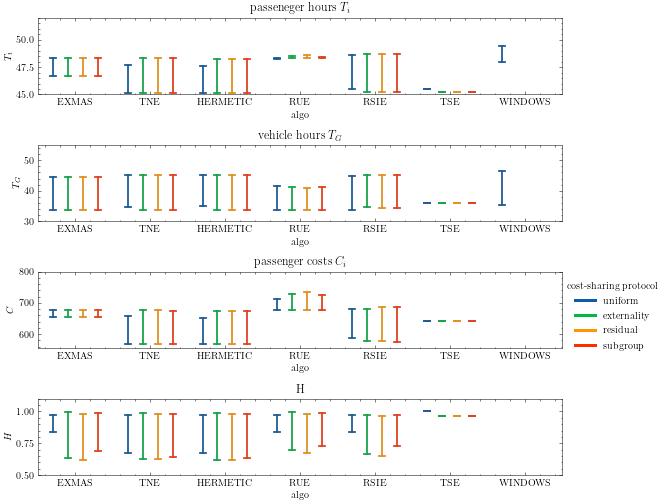

In [100]:
fig, axes = plt.subplots(4,1, figsize = (10,8))
axes = axes.flatten()
titles = ['passeneger hours $T_i$', 'vehicle hours $T_G$', 'passenger costs $C_i$' , 'H']
for i, KPI in enumerate(['$T_i$','$T_G$', '$C$' , '$H$']):
    sns.barplot(y = KPI, x = 'algo', hue = 'pricing', data = KPIs, alpha = 0, ci = 100, capsize = 0.08, ax = axes[i])
    #sns.stripplot(y = KPI, x = 'algo', hue = 'pricing', data = KPIs[KPIs.minmax == 'min'], marker = 'v',ax = axes[i])
    #sns.barplot(y = KPI, x = 'algo', hue = 'pricing', data = KPIs[KPIs.minmax == 'min'], alpha = 1, ci = 100, capsize = 0.05, ax = axes[i])

    axes[i].get_legend().remove()
    axes[i].set_title(titles[i])
    patches = axes[i].patches
    capsize = .1
    lines_per_err = 1 if capsize is None else 3

    for i, line in enumerate(axes[i].get_lines()):

        newcolor = patches[i // lines_per_err].get_facecolor()
        line.set_color(newcolor)
        line.set_alpha(1)
axes[0].set_ylim((45,52))
axes[1].set_ylim((30,55))
axes[2].set_ylim((555,800))
axes[3].set_ylim((0.5,1.1))
custom = [Line2D([], [], marker='', color=colors[i], linestyle='-', lw = 3) for i in [0,1,2,3]]

axes[2].legend(custom, ['uniform','externality','residual','subgroup'], loc='upper right',bbox_to_anchor=(1.2, 1), title = 'cost-sharing protocol') 



#connector, caplines, (vertical_lines,) = container.errorbar.lines
#vertical_lines.set_color(colors)
plt.tight_layout(rect=[0, 0.05, 0.95, 0.95])
#plt.savefig('bars.png',dpi=600)

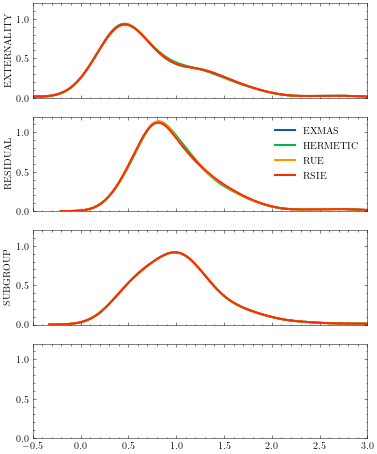

In [12]:
for PRICING in ['EXTERNALITY','RESIDUAL','SUBGROUP']:
    rm['fare_{}'.format(PRICING)] = rm[PRICING]-rm.cost_user
    rm['kmfare {}'.format(PRICING)] = rm['fare_{}'.format(PRICING)]/rm.distance   
EXPERIMENT_NAME = 'res400a_1'
plt.style.use(['science'])
PRICINGS = ['EXTERNALITY','RESIDUAL','SUBGROUP']
fig, axes = plt.subplots(4,1, figsize = (6,8), sharey = True, sharex = True)
axes = axes.flatten()
j=-1
for i,PRICING in enumerate(PRICINGS):
    
    for j, ALGO in enumerate(['EXMAS',  'HERMETIC', 'RUE', 'RSIE', ]):
        
        col = "Experiment-{}_Pricing-{}_Objective-['total_group_cost']_Pruning-['{}']_minmax-min".format(EXPERIMENT_NAME, PRICING, ALGO)
        to_plot = rm[rm[col] == 1]
        sns.distplot(to_plot['kmfare {}'.format(PRICING)],ax = axes[i], 
                     kde = True, hist = False, label = ALGO, 
                     rug_kws={"alpha":0.2, 'height':0.1, 'lw':2}, 
                     kde_kws={'bw':0.35, 'lw': 2, 'cumulative': False}, 
                     rug = False) 
        axes[i].set_ylabel(PRICING)  
        axes[i].set_xlabel('km fare')  
        
#         to_plot['$\Delta C$']=(to_plot[PRICING]-to_plot['desired_{}'.format(PRICING)])/to_plot['desired_{}'.format(PRICING)]
#         sns.distplot(to_plot['$\Delta C$'],ax = axes[j], kde = True, hist = False, label = PRICING, rug_kws={"alpha":0.2, 'height':0.2, 'lw':2}, kde_kws={'bw':0.05, 'lw': 2, 'cumulative': True}, rug = True) 
        axes[i].set_xlim((-0.5,3))

        #axes[i].set_xscale('log')
        #axes[i].get_legend().remove()
        axes[i].set_ylim((0,1.2))
axes[1].legend()
#plt.savefig('fares.png', dpi = 600)

In [28]:
EXPERIMENT_NAME = 'game_results/res400_4'
KPIs = pd.read_csv('ExMAS/extras/{}_KPIs.csv'.format(EXPERIMENT_NAME), index_col = 0)
rides = pd.read_csv('ExMAS/extras/{}_rides.csv'.format(EXPERIMENT_NAME), index_col = 0)
col = 'indexes'
import json
rides[col] = rides[col].apply(lambda x: json.loads(x))
rm = pd.read_csv('ExMAS/extras/{}_rm.csv'.format(EXPERIMENT_NAME), index_col = [0,1])
EXPERIMENT_NAME = 'res400_4'

In [29]:
import netwulf as nw

In [30]:
requests = pd.DataFrame(index = rm.traveller.unique())

In [31]:
_, config, _ = nw.load("netwulf_config.json") # load config
_, config_schedule, _ = nw.load("netwulf_config_schedule.json") # load config

(2084, 118)
(1541, 118)
(1337, 118)


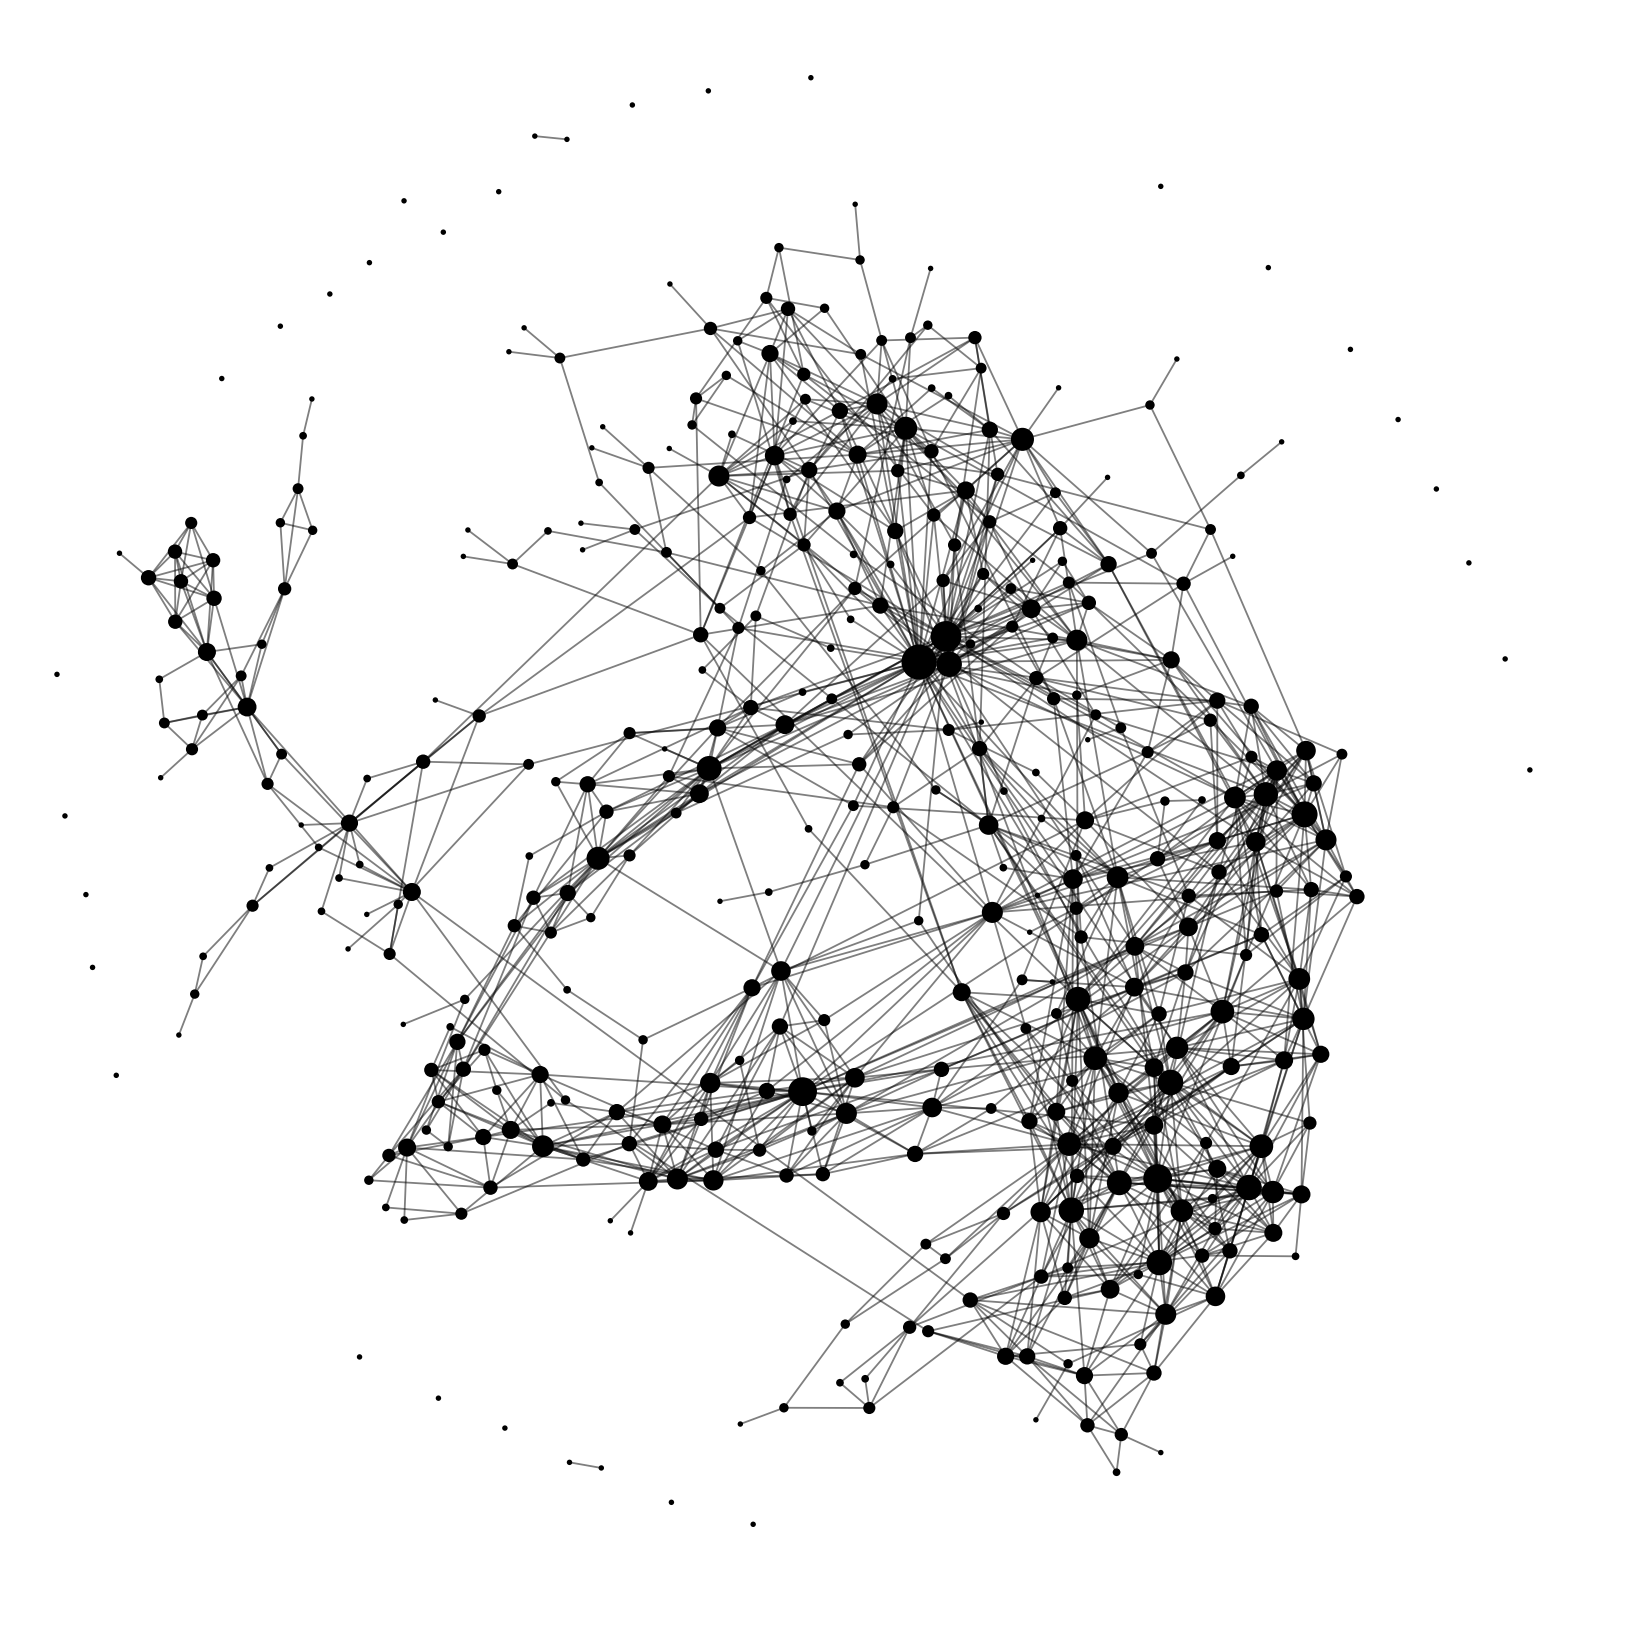

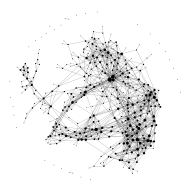

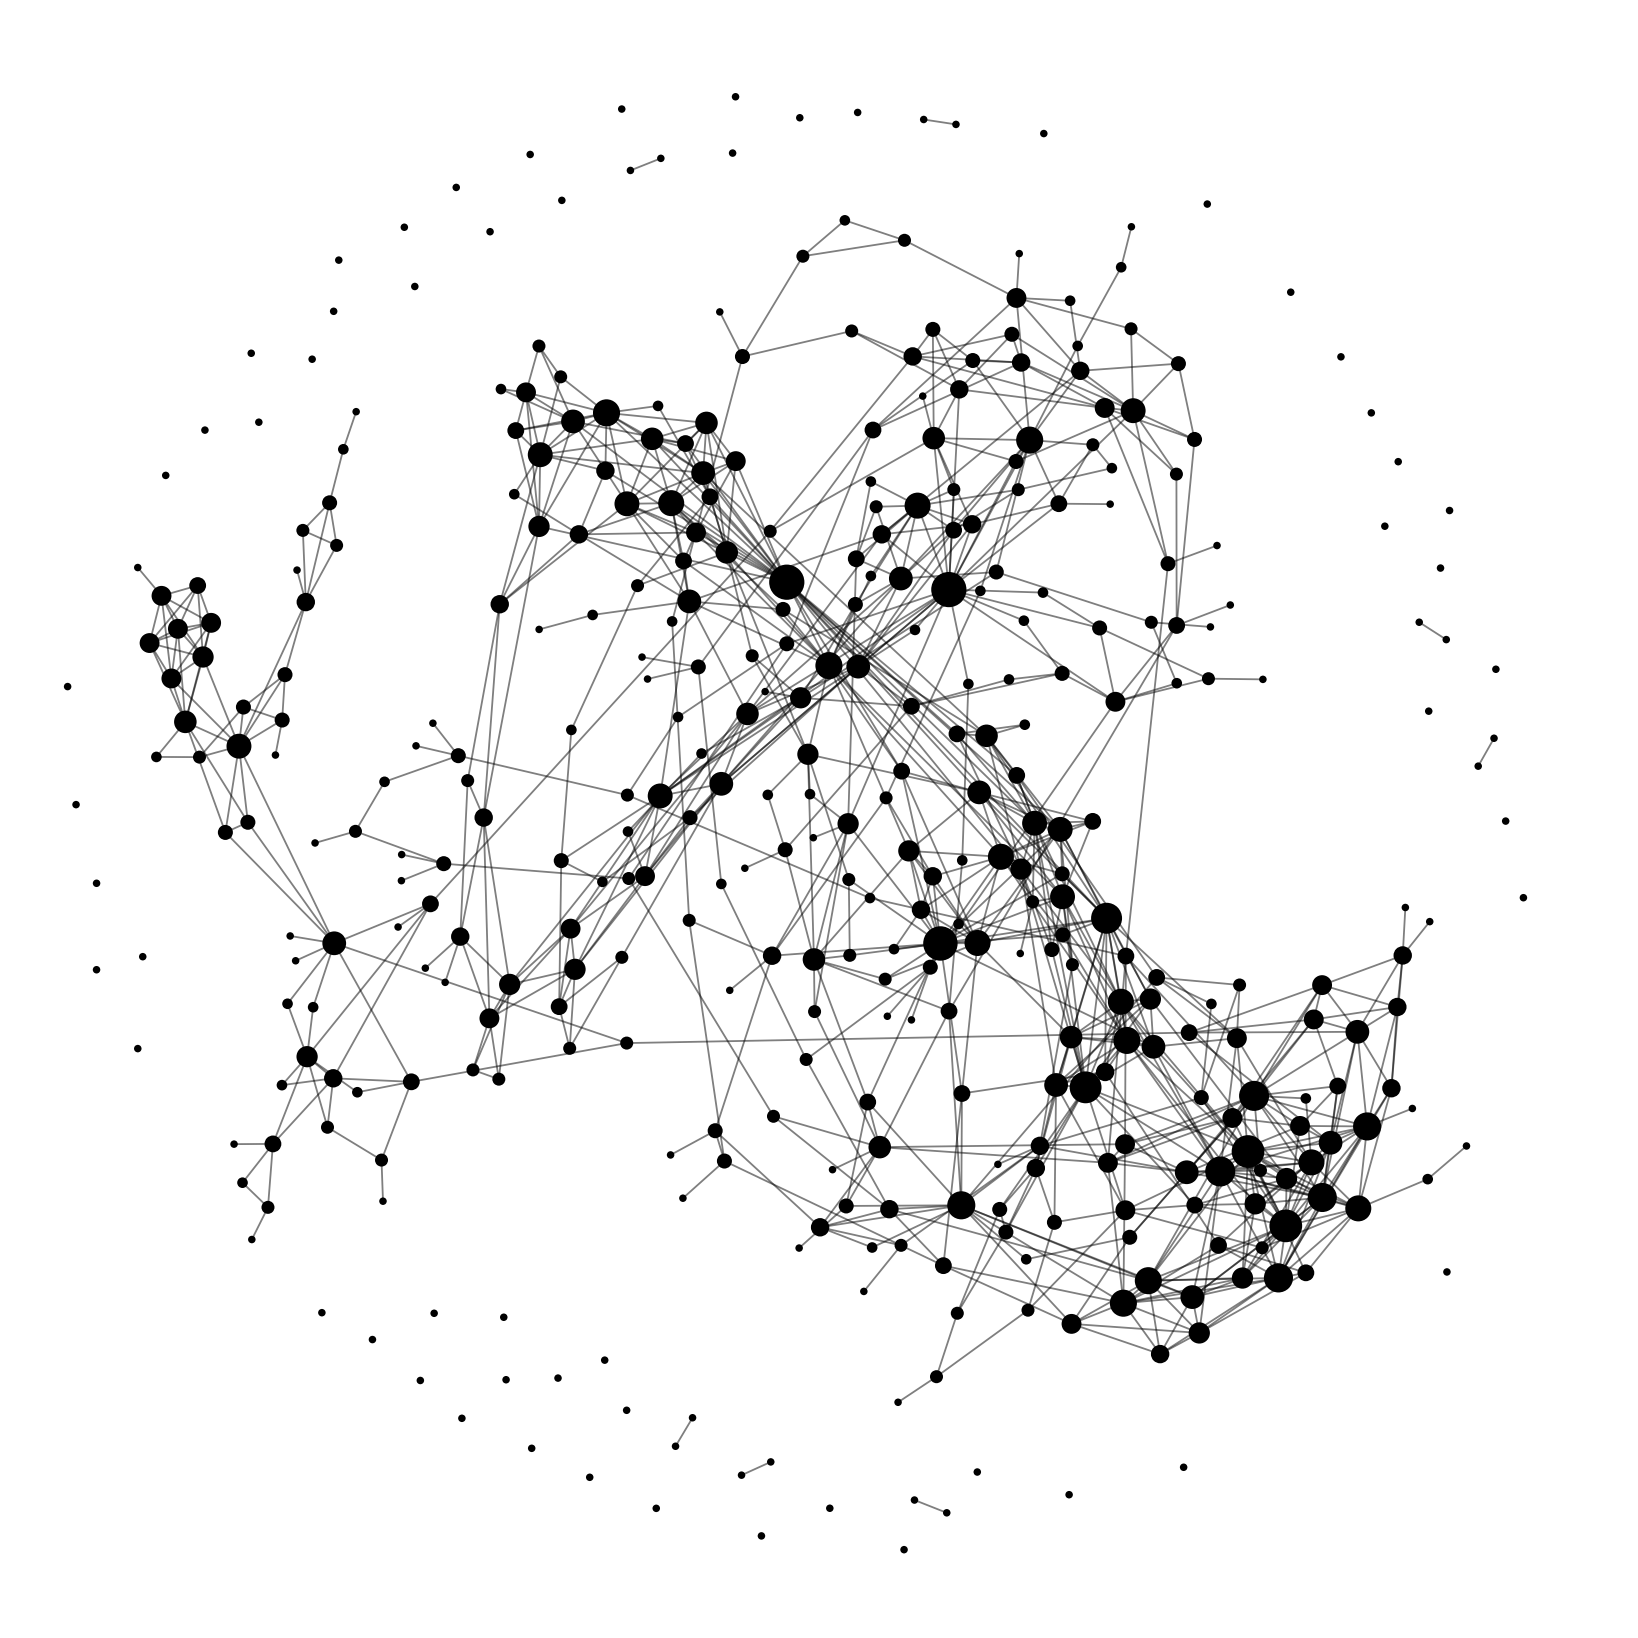

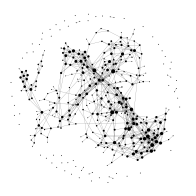

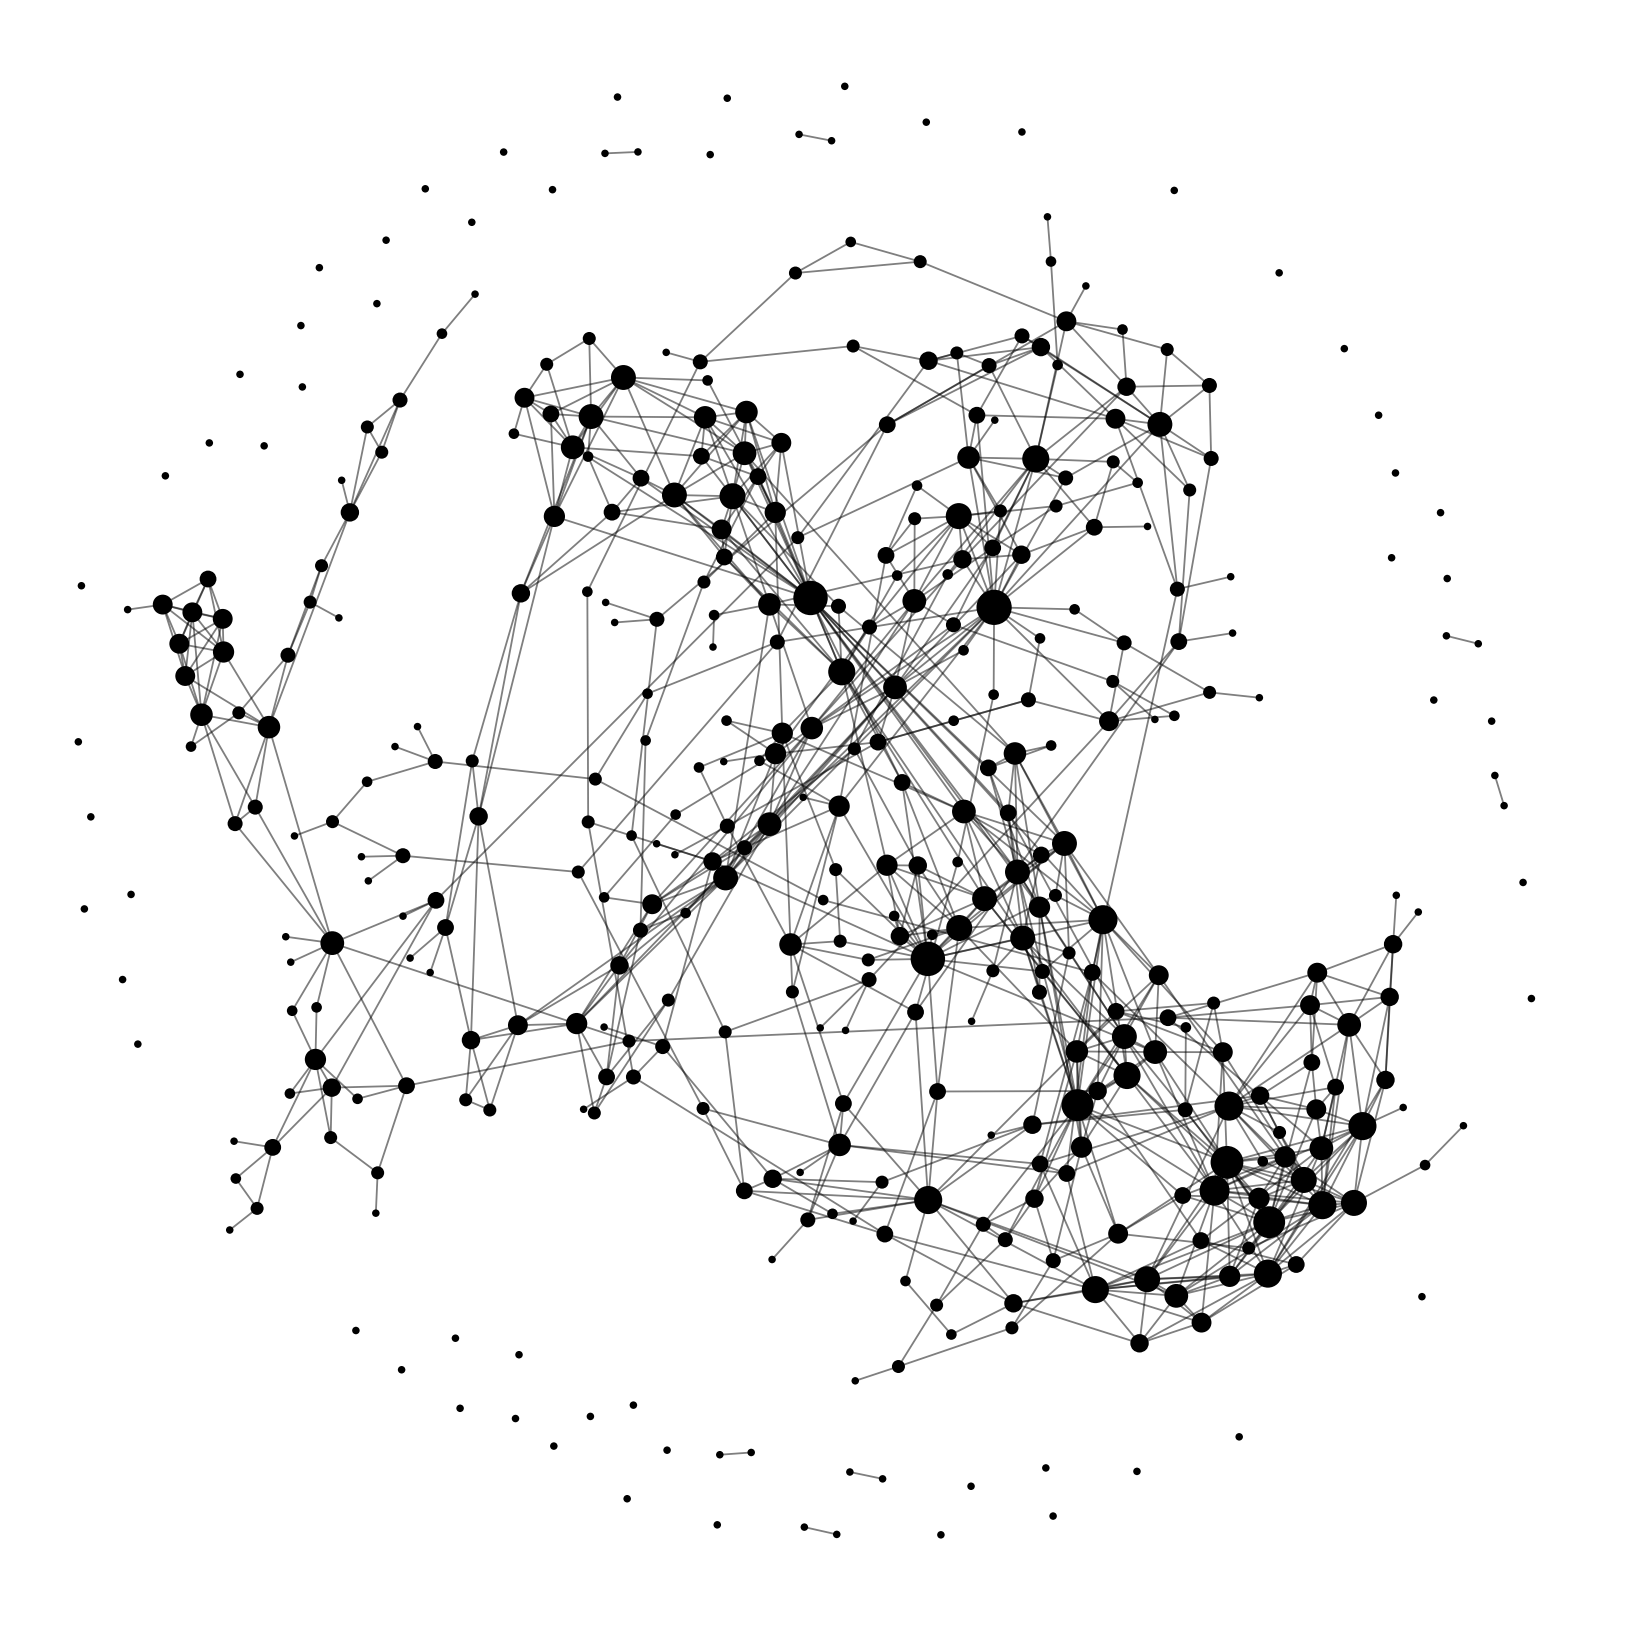

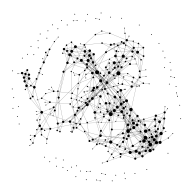

In [32]:
PRICING = 'SUBGROUP'
for algo in ['EXMAS', 'TNE', 'HERMETIC']:
    pruning_column = "pruned_Pricing-{}_Pruning-['{}']".format(PRICING, algo)
    matching_column = "Experiment-{}_Pricing-{}_Objective-['total_group_cost']_Pruning-['{}']_minmax-min".format(EXPERIMENT_NAME,PRICING,algo)
    print(rides[rides[pruning_column]==True].shape)
    fig, ax = plt.subplots(figsize = (30,30))
    G = ExMAS.utils.make_shareability_graph(requests, rides[rides[pruning_column]==True])
    f, _ = nw.visualize(G, config = config)
    _, _ = nw.draw_netwulf(f, fig = fig, ax = ax)
    plt.savefig("g_{}_{}.png".format(algo,'pruning'))
#     fig, ax = plt.subplots(figsize = (30,30))
#     G = ExMAS.utils.make_shareability_graph(requests, rides[rides[matching_column]==1])
#     f, _ = nw.visualize(G, config = config_schedule)
#     _, _ = nw.draw_netwulf(f, fig = fig, ax = ax)
#     plt.savefig("g_{}_{}.png".format(algo,'matching'))

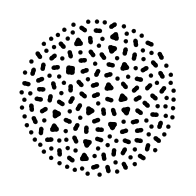

In [240]:
#G = ExMAS.utils.make_shareability_graph(requests, rides[rides[matching_column]==1])
#stylized_network, config_schedule = nw.visualize(G)  # create config
#nw.save("netwulf_config_schedule.json", stylized_network, config_schedule) # save config

In [32]:
os.chdir("/Users/rkucharski/Documents/GitHub/ExMAS")
from IPython.display import display # to display images

g_EXMAS_pruning.png 0 596
g_EXMAS_matching.png 596 596
g_TNE_pruning.png 0 596
g_TNE_matching.png 596 596
g_HERMETIC_pruning.png 0 596
g_HERMETIC_matching.png 596 596


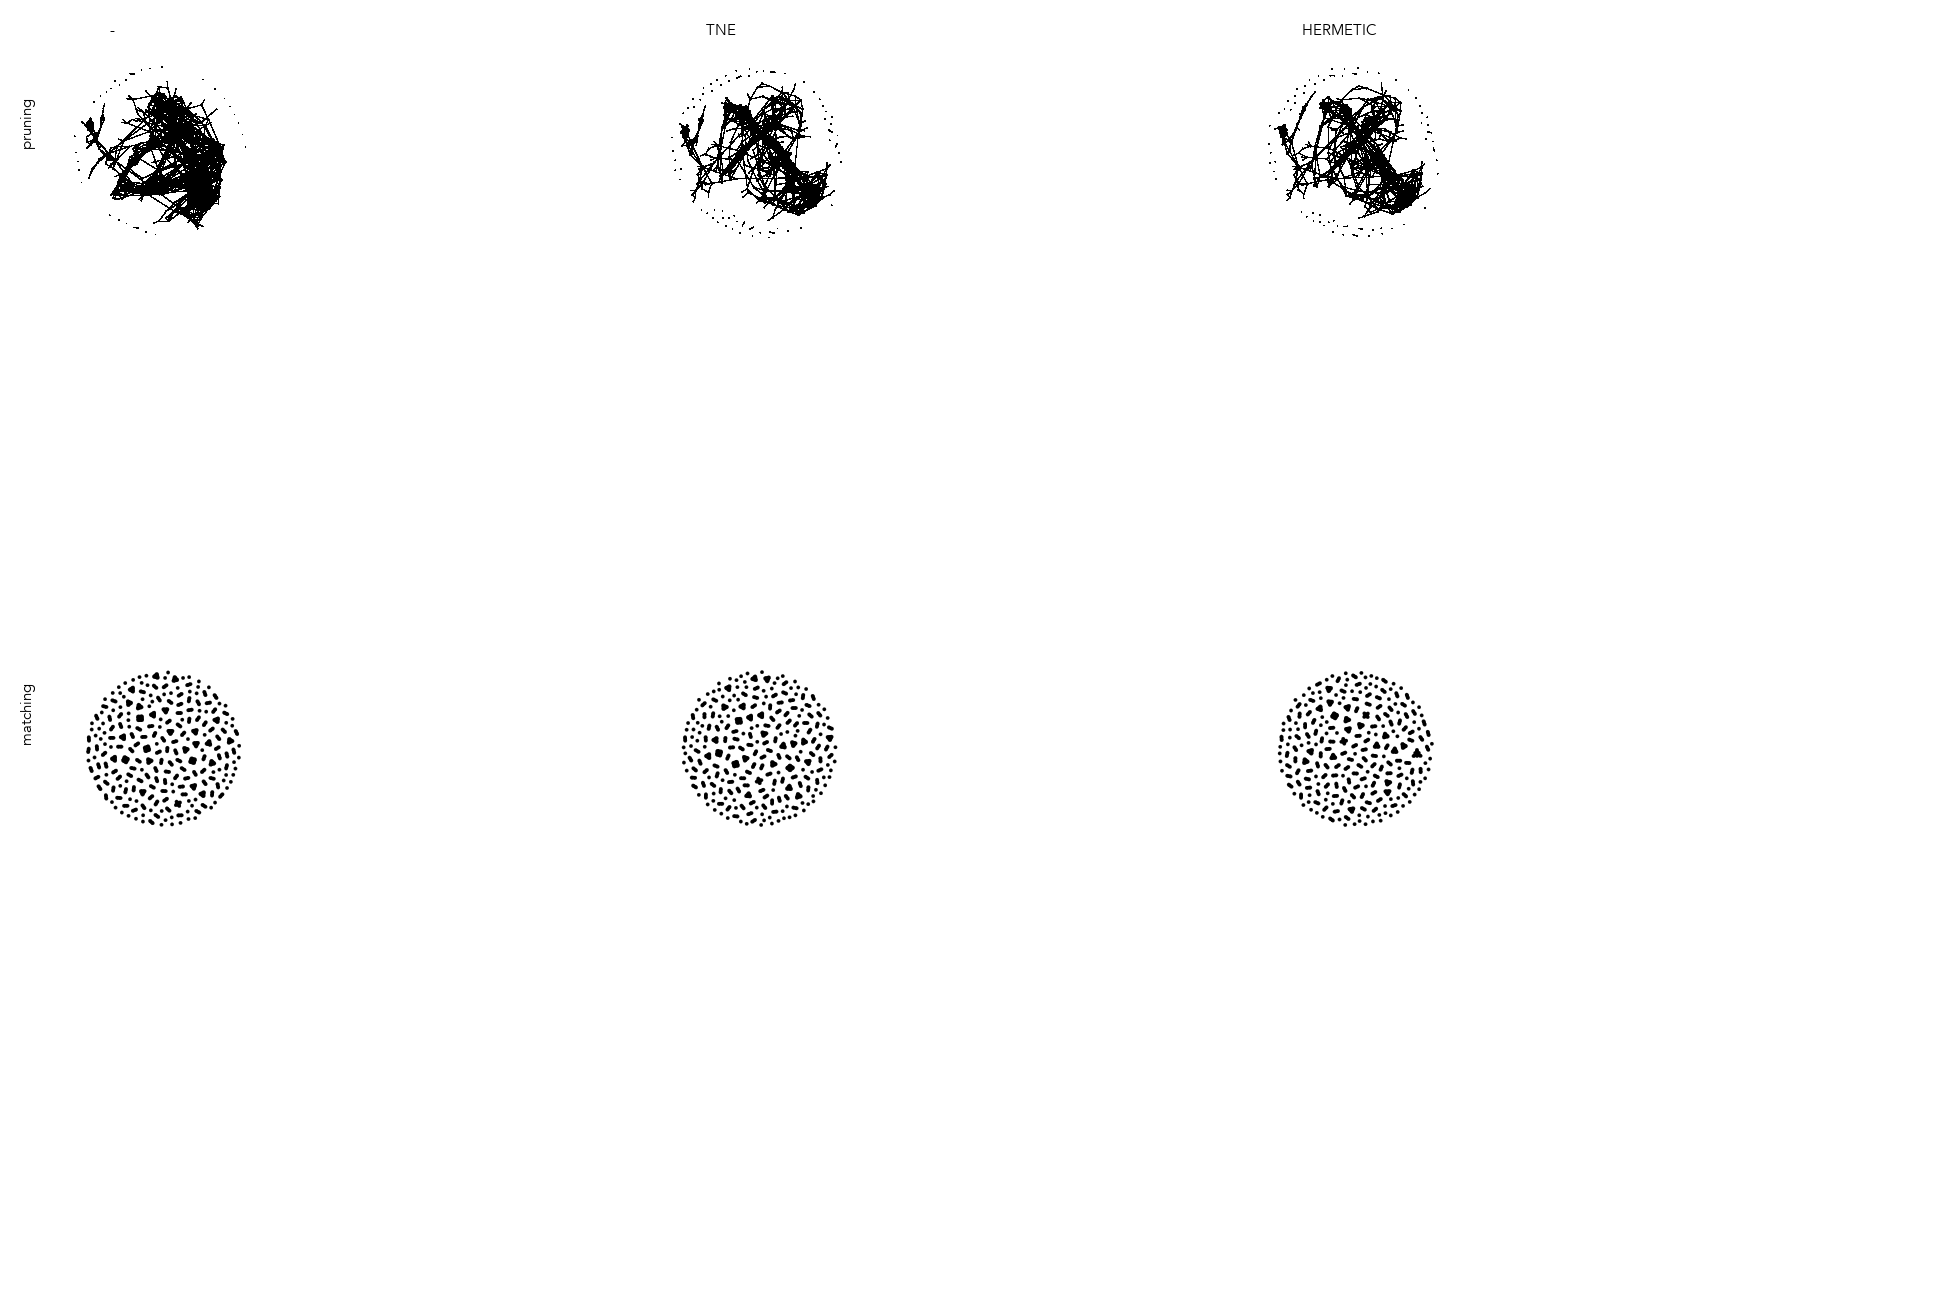

In [33]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw , ImageOps
size = 596
rows = 2
cols = 3
header = 50
col_names = ['EXMAS', 'TNE', 'HERMETIC']
col_titles = ['-', 'TNE', 'HERMETIC']
#names = ['a) PT travel time','b) Uber travel time', 'c) Time Gap', 'd) Cost Gap', 'e) Uber added value' ]
new_im = Image.new('RGB', (size*cols+3*header,size*rows+2*header), (255,255,255))
row_names = ['pruning', 'matching']
font = ImageFont.truetype("Avenir.ttc", 15)
draw = ImageDraw.Draw(new_im) 
for i in range(0,size*cols,size): # kolumny
    shift = 10

    draw.text((int(header)+i+10+50, 20),col_titles[int(i/size)],(0,0,0),font=font)
    for j in range(0,size*rows,size): # wiersze
        
        PATH = 'g_{}_{}.png'.format(col_names[int(i/size)],row_names[int(j/size)])
        #'../data/results/figs/{}_{}_{}_{}.png'.format(file_header, level, CITIES[int(j/size)],  FIELDS[int(i/size)])
        print(PATH, j, size)
        im = Image.open(PATH)
        #im.thumbnail((size*0.99,size*0.99))
        if i == 0:
            txt=Image.new('L', (250,50))
            d = ImageDraw.Draw(txt)
            d.text( (0, 0), row_names[int(j/size)],  font=font, fill=255)
            w=txt.rotate(90,  expand=1)
            new_im.paste( ImageOps.colorize(w, (0,0,0), (0,0,0)), (int(header/3),j-100),  w)
        new_im.paste(im, (header+i+int(size/100)+shift,header+j+int(size/100)))
#         im = Image.open('../data/results/figs/scale_1.png')
#         im.thumbnail((size*0.8,header))
#         new_im.paste(im, (400,3*size+header))
#         im = Image.open('../data/results/figs/scale_2.png')
#         im.thumbnail((size*0.8,header))
#         new_im.paste(im, (header+1400,3*size+header))
#         im = Image.open('../data/results/figs/scale_3.png')
#         im.thumbnail((size*0.8,header))
#         new_im.paste(im, (header+2150,3*size+header))
new_im.save('grafs.jpg', quality=100)

display(new_im)       

---
(c) Rafał Kucharski, Delft, 2020